<a href="https://colab.research.google.com/github/The-P-P/Time-Sereies/blob/main/Time_Sereies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Analisando as vendas

In [165]:
import pandas as pd

In [166]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [167]:
alucar =  pd.read_csv('alucar.csv')

In [168]:
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [169]:
print(f'quantidade de linhas e colunas: {alucar.shape}')

quantidade de linhas e colunas: (24, 2)


In [170]:
print(f'quantidade de dados nulos: {alucar.isna().sum().sum()}')

quantidade de dados nulos: 0


In [171]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [172]:
alucar['mes']= pd.to_datetime(alucar['mes'])

In [173]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [174]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import seaborn as sns

In [176]:
%matplotlib inline
from matplotlib import pyplot as plt

In [177]:
sns.__version__

'0.9.0'

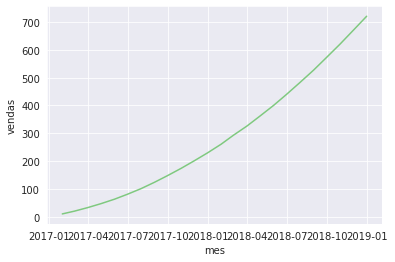

In [178]:
sns.lineplot(x='mes', y='vendas', data=alucar)

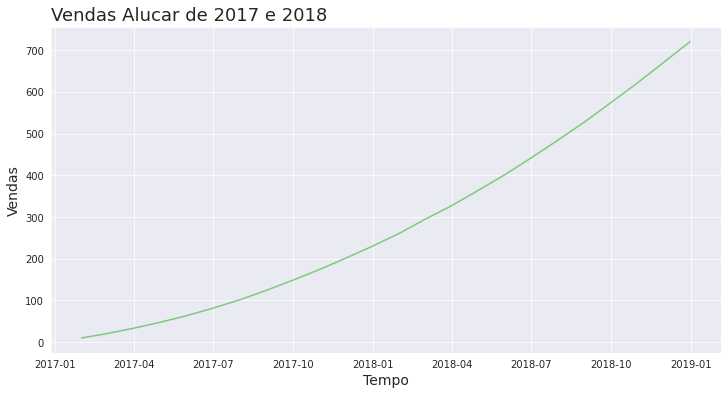

In [179]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

In [180]:
alucar['aumento'] = alucar['vendas'].diff()

In [181]:
alucar


,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


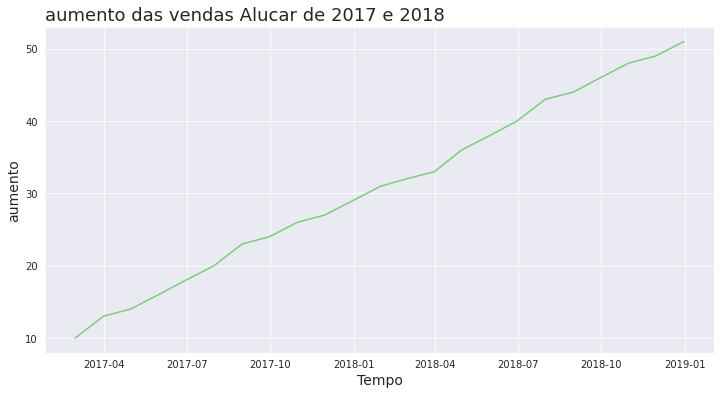

In [182]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('aumento das vendas Alucar de 2017 e 2018',loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('aumento', fontsize=14)
ax = ax

In [183]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

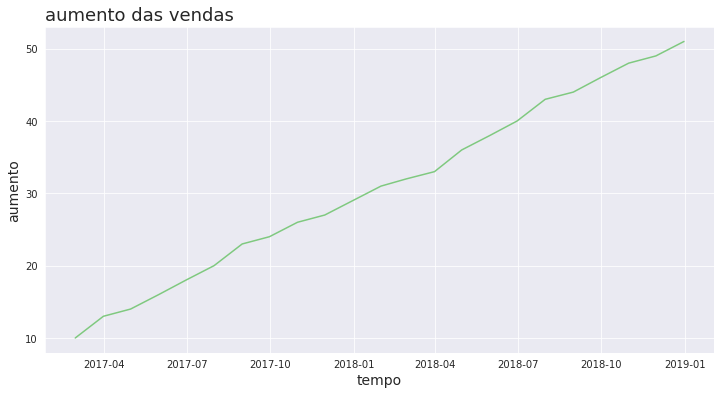

In [184]:
plotar('aumento das vendas','tempo', 'aumento', 'mes','aumento', alucar )

In [185]:
alucar['aceleracao'] = alucar['aumento'].diff()

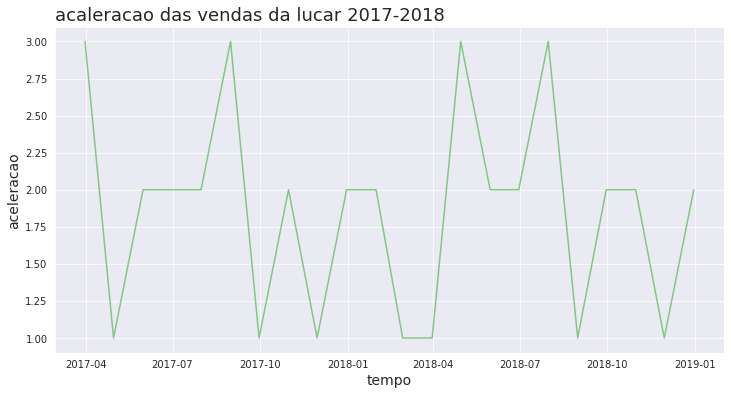

In [186]:
plotar('acaleracao das vendas da lucar 2017-2018', 'tempo', 'aceleracao', 'mes', 'aceleracao', alucar)

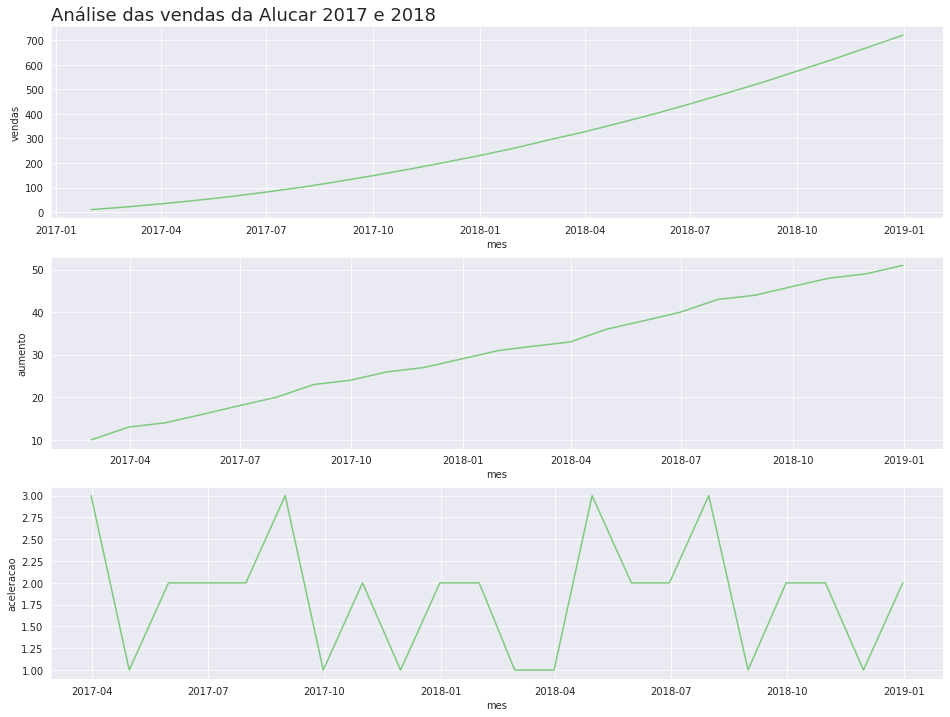

In [187]:

plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [188]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax=ax

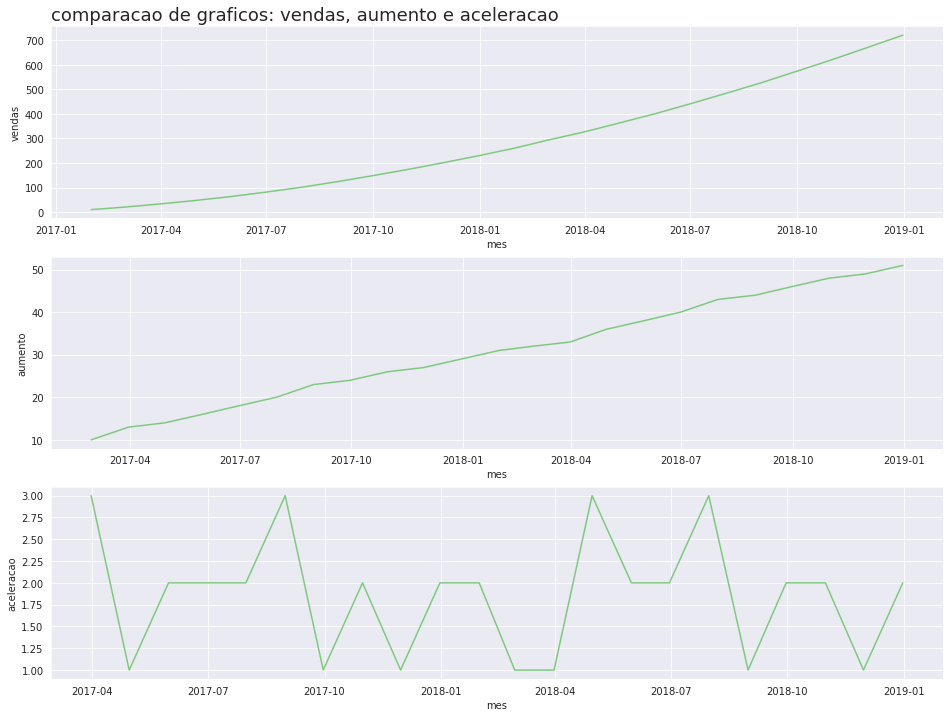

In [189]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'comparacao de graficos: vendas, aumento e aceleracao')

In [190]:
from pandas.plotting import autocorrelation_plot as aup

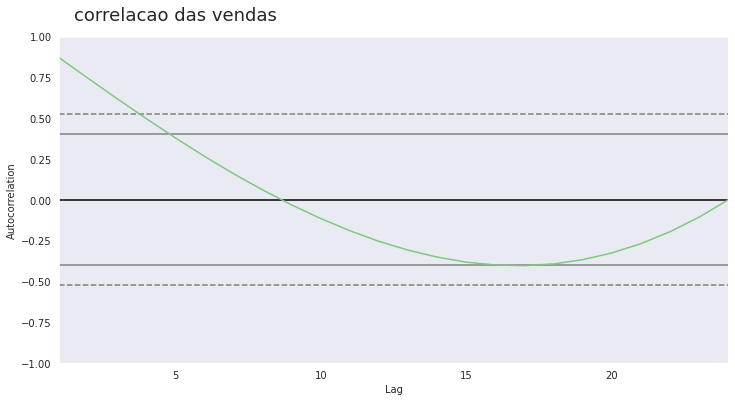

In [191]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('correlacao das vendas', fontsize=18, x=0.26, y=0.95)
aup(alucar.vendas)
ax = ax

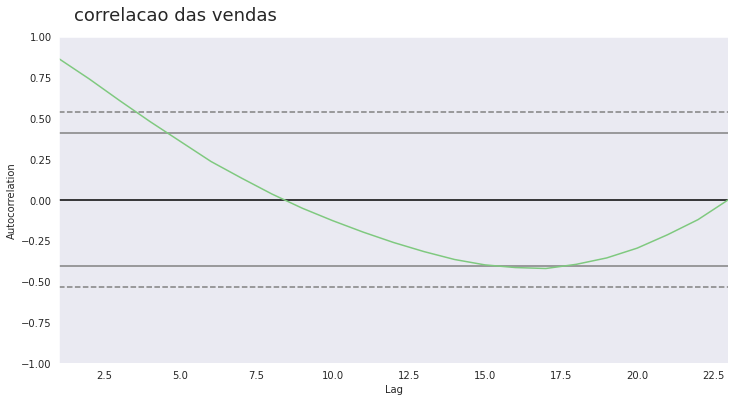

In [192]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('correlacao das vendas', fontsize=18, x=0.26, y=0.95)
aup(alucar.aumento[1:])
ax = ax

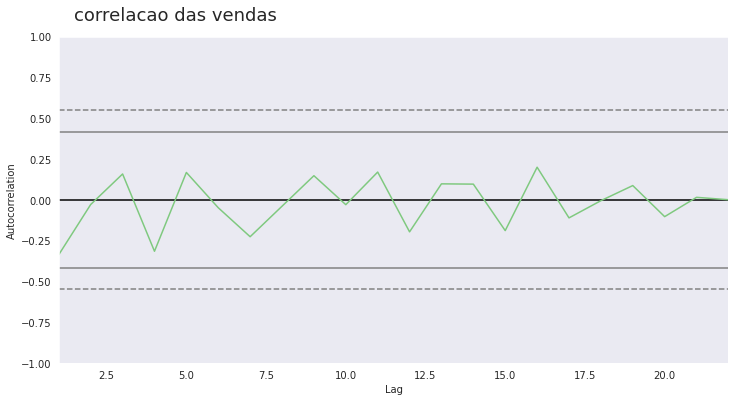

In [193]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('correlacao das vendas', fontsize=18, x=0.26, y=0.95)
aup(alucar.aceleracao[2:])
ax = ax

In [194]:
def correlacao(titulo, tabela, i):
  ax = plt.figure(figsize=(12,6))
  ax.suptitle(titulo, fontsize=18, x=0.26, y=0.95)
  aup(tabela[i:])
  ax = ax

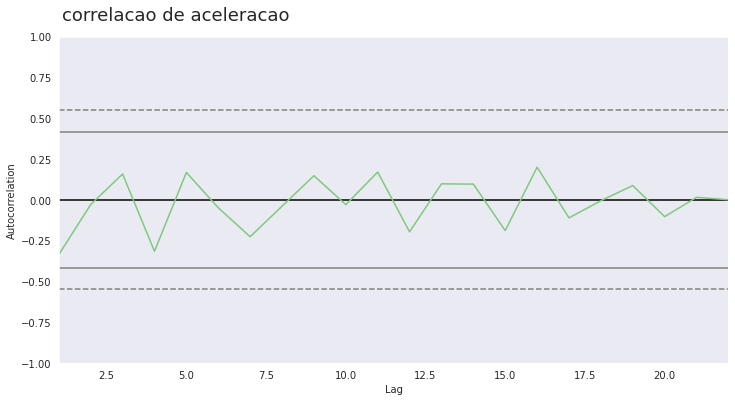

In [195]:
correlacao('correlacao de aceleracao', alucar.aceleracao, 2)

# Alucar - Analaisando assinantes da newsletter

In [196]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [197]:
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [198]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [199]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [200]:
assinantes.mes = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [201]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()


In [202]:
assinantes

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


* codigo da funcao a seguir
```
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax=ax
```

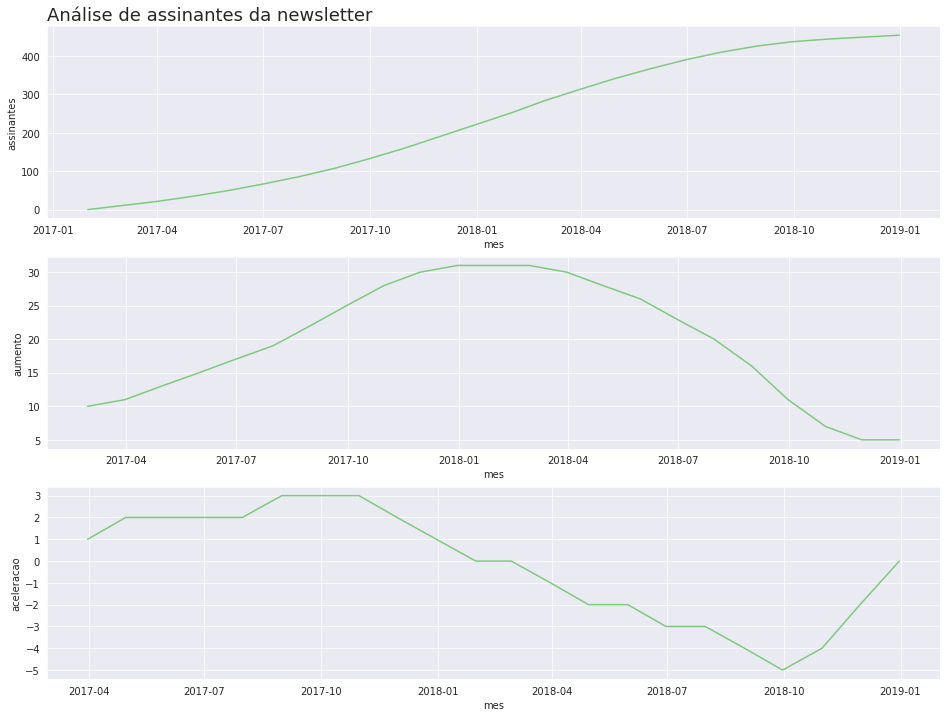

In [203]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# chocolura -  analisando as vendas

In [204]:
data = pd.read_csv('chocolura.csv')

In [205]:
data

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [206]:
data.dtypes

mes       object
vendas     int64
dtype: object

In [207]:
data.mes = pd.to_datetime(data.mes)

In [208]:
data.dtypes


mes       datetime64[ns]
vendas             int64
dtype: object

In [209]:
print ('Quantidade de linhas:', data.shape)
print ('Quantidade de dados nulos:', data.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [210]:
data['aumento']= data ['vendas'].diff()
data['aceleracao']= data ['aumento'].diff()

In [211]:
data


,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


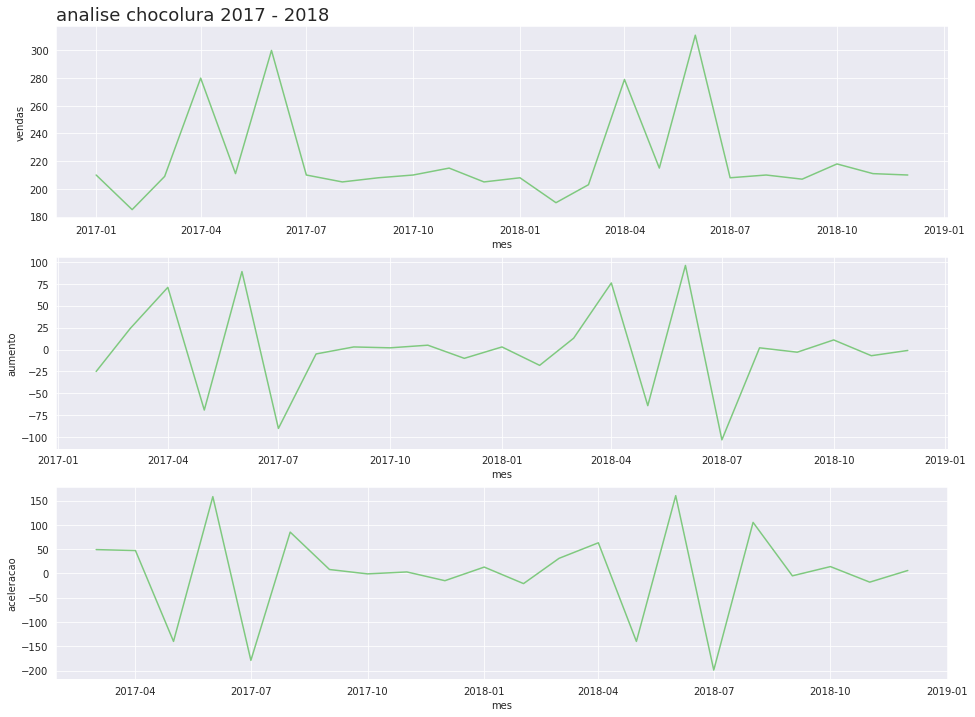

In [212]:
plot_comparacao(data.mes, data.vendas, data.aumento, data.aceleracao, data, 'analise chocolura 2017 - 2018')

# chocolura - vendas diarias( mes 10, 11)

In [213]:
vendas_dias = pd.read_csv('vendas_por_dia.csv')

In [214]:
vendas_dias

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [215]:
print ('Quantidade de linhas:',vendas_dias.shape)
print ('Quantidade de dados nulos:', vendas_dias.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [216]:
vendas_dias.dia = pd.to_datetime(vendas_dias.dia)

In [217]:
vendas_dias['aumento']= vendas_dias['vendas'].diff()
vendas_dias['aceleracao']= vendas_dias ['aumento'].diff()

In [218]:
vendas_dias

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
...,...,...,...,...
56,2018-11-26,54,34.0,31.0
57,2018-11-27,60,6.0,-28.0
58,2018-11-28,49,-11.0,-17.0
59,2018-11-29,50,1.0,12.0


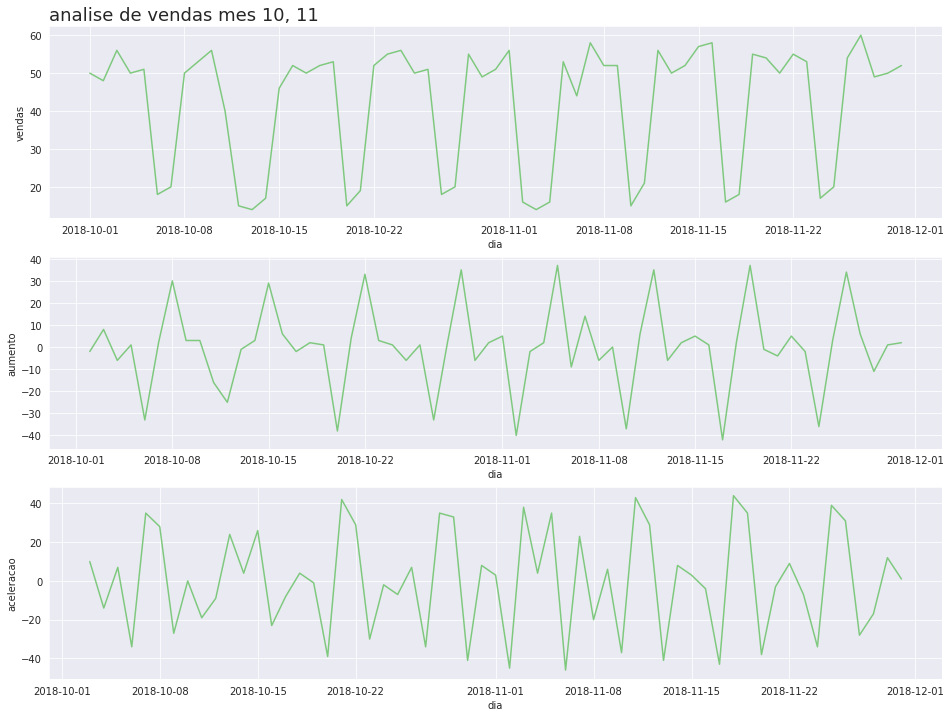

In [219]:
plot_comparacao(vendas_dias.dia, vendas_dias.vendas, vendas_dias.aumento, vendas_dias.aceleracao, vendas_dias, 'analise de vendas mes 10, 11')

**analizando as sazonalidades**

In [220]:
vendas_dias['dia_da_semana'] = vendas_dias ['dia'].dt.day_name()

In [221]:
vendas_dias

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [222]:
vendas_dias['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [223]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [224]:
vendas_dias['dia_da_semana'] = vendas_dias['dia_da_semana'].map(dias_traduzidos)
vendas_dias.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**agrupando os dias**

In [225]:
vendas_agrupadas = vendas_dias.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-225-58ac1d5aa1cc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_dias.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [226]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


```
def correlacao(titulo, tabela, i):
  ax = plt.figure(figsize=(12,6))
  ax.suptitle(titulo, fontsize=18, x=0.26, y=0.95)
  aup(tabela[i:])
  ax = ax
```

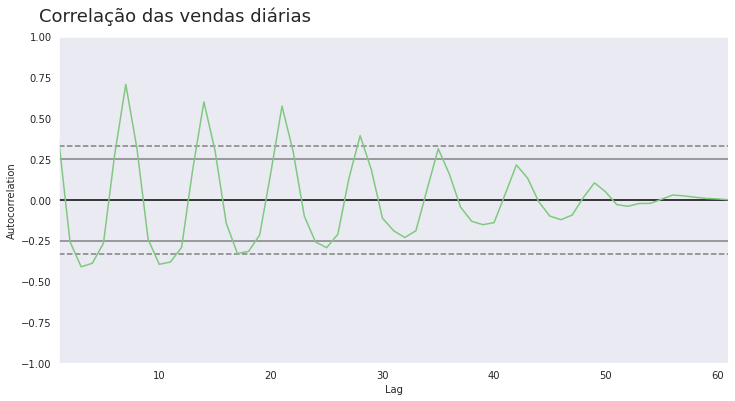

In [227]:
correlacao('Correlação das vendas diárias',vendas_dias.vendas,0)

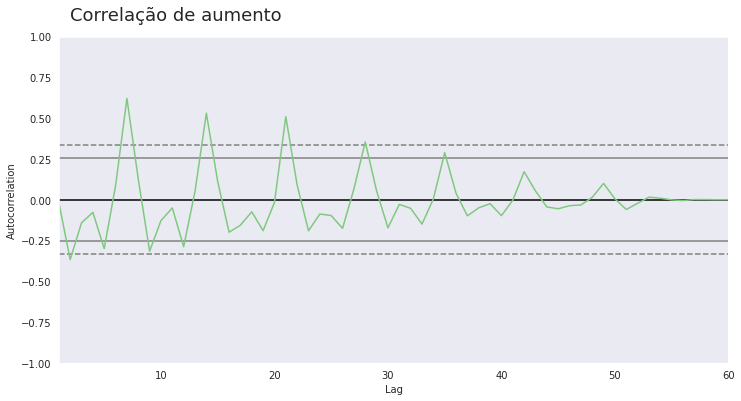

In [228]:
correlacao('Correlação de aumento',vendas_dias.aumento,1)

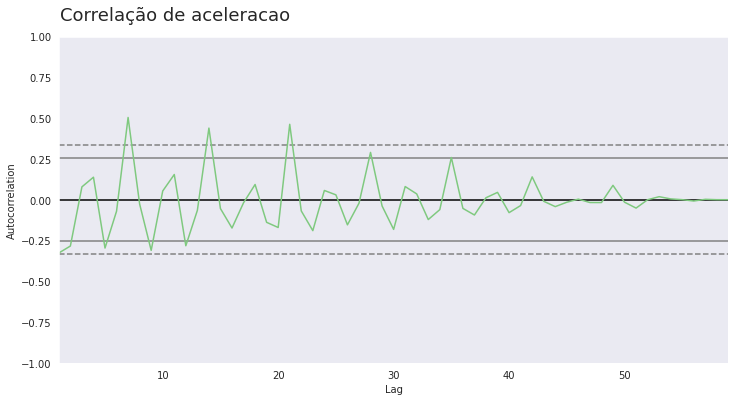

In [229]:
correlacao('Correlação de aceleracao',vendas_dias.aceleracao,2)


# cafelura -  analise de vendas

In [230]:
cafe = pd.read_csv('cafelura.csv')

In [231]:
cafe

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


In [232]:
cafe.dtypes

mes       object
vendas     int64
dtype: object

In [233]:
cafe.mes = pd.to_datetime(cafe.mes)

In [234]:
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [235]:
print('Quantidade de linhas e colunas:', cafe.shape)
print('Quantidade de dados nulos:', cafe.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


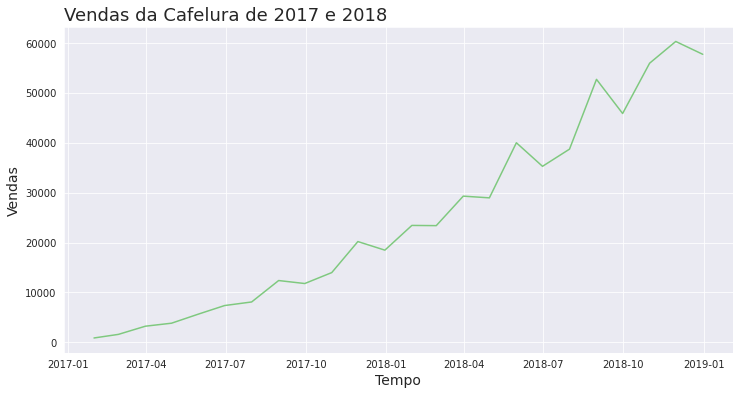

In [236]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafe)

In [237]:
fds = pd.read_csv('dias_final_de_semana.csv')

In [238]:
fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [239]:
fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [240]:
cafe['vendas_normalizadas'] = cafe['vendas'] / fds['quantidade_de_dias'].values


In [241]:
cafe

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


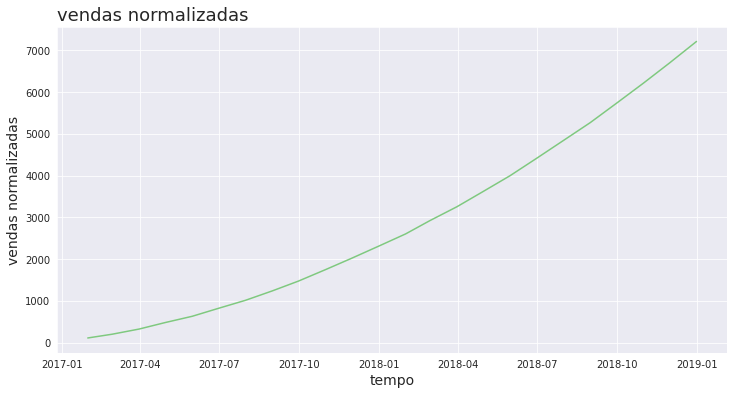

In [242]:
plotar('vendas normalizadas', 'tempo', 'vendas normalizadas', 'mes', 'vendas_normalizadas', cafe )

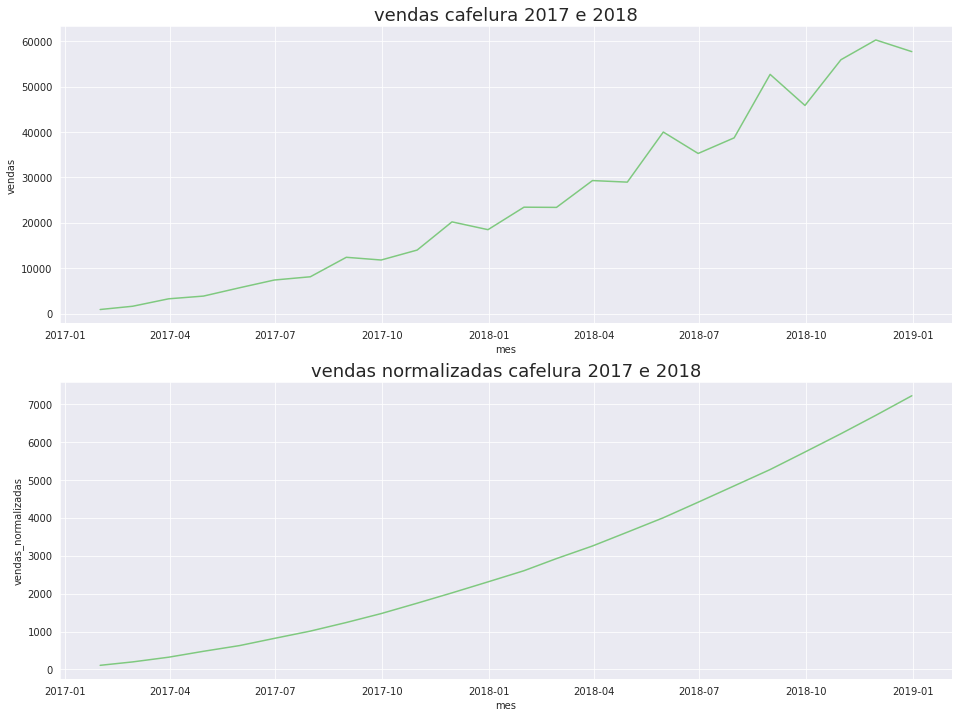

In [243]:
plt.figure(figsize=(16,12))
ax =  plt.subplot(2,1,1)
ax.set_title('vendas cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafe)
ax = plt.subplot(2,1,2)
ax.set_title('vendas normalizadas cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafe)
ax = ax

# statsmodels

In [244]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd


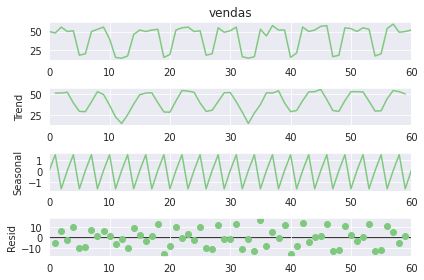

In [258]:
resultado =  sd(vendas_dias.vendas, period=3)
ax = resultado.plot()

In [259]:
observacao = resultado.observed
tendencia =  resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado. resid

In [260]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,50.0,NaN,0.073977,NaN
1,48.0,51.333333,1.504678,-4.838012
2,56.0,51.333333,-1.578655,6.245322
3,50.0,52.333333,0.073977,-2.407310
4,51.0,39.666667,1.504678,9.828655


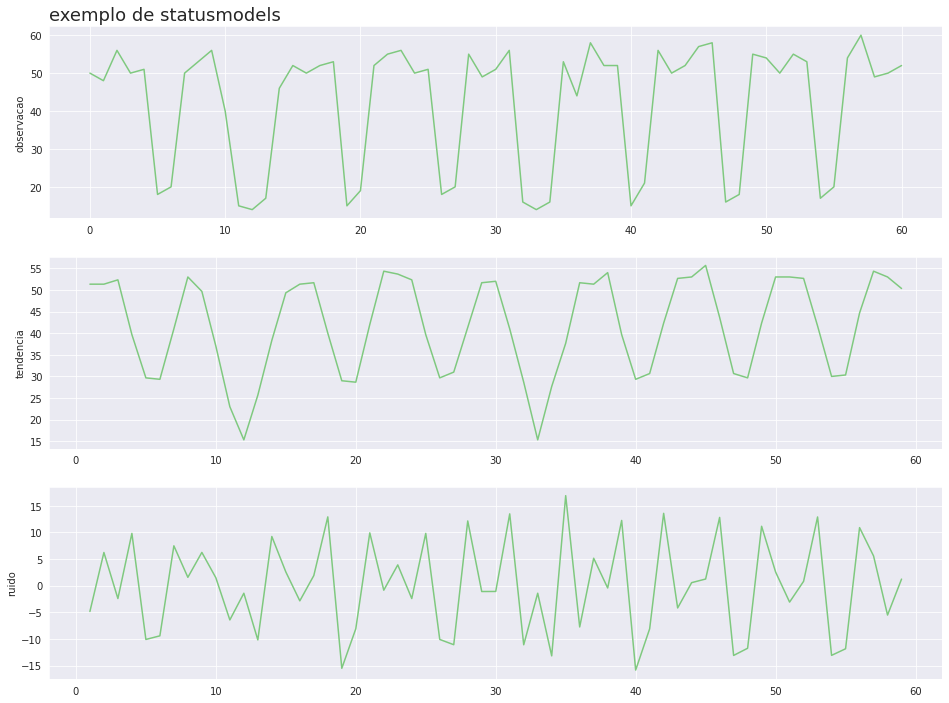

In [264]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'exemplo de statusmodels' )

# Alucel - analise de vendas

In [265]:
alucel = pd.read_csv('alucel.csv')

In [266]:
alucel


,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
...,...,...
56,2018-11-26,10773.53
57,2018-11-27,22984.56
58,2018-11-28,9216.26
59,2018-11-29,12147.61


In [267]:
alucel.dia = pd.to_datetime(alucel.dia)

In [268]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [269]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [270]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

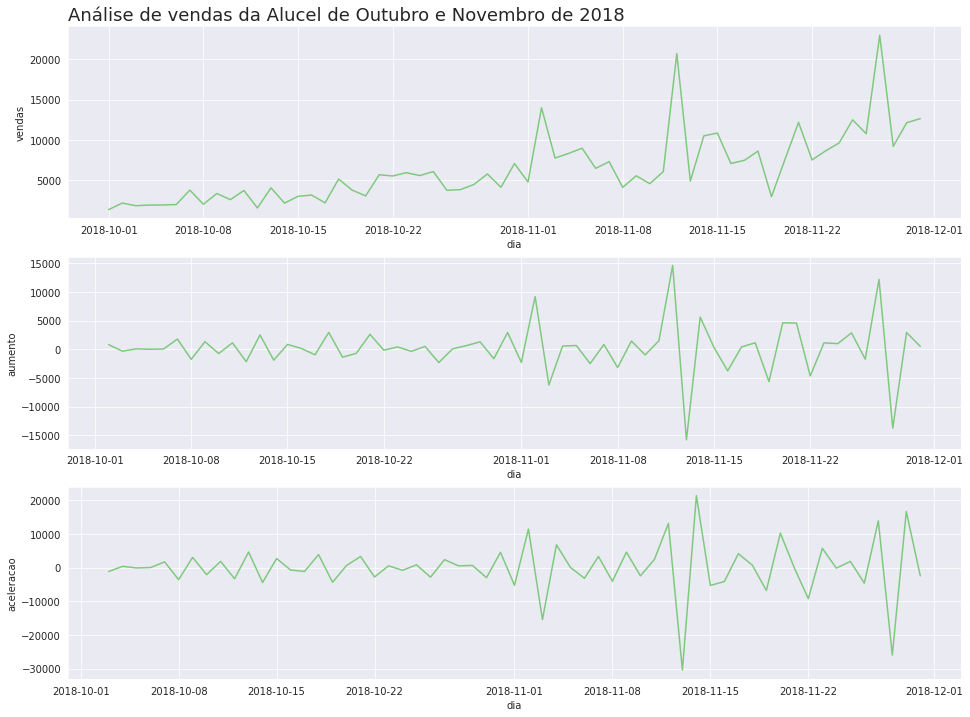

In [271]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**media movel**

In [287]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [288]:
alucel

,dia,vendas,aumento,aceleracao,media_movel,media_movel21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
...,...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714,8391.130000
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429,9176.810000
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714,9267.123333
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571,9649.053810


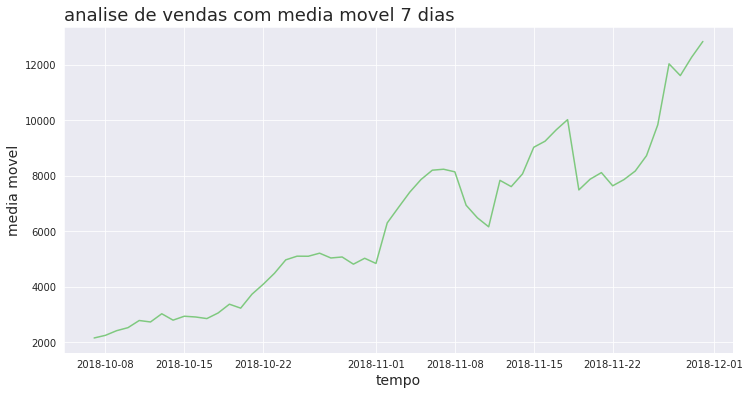

In [289]:
plotar('analise de vendas com media movel 7 dias', 'tempo', 'media movel', 'dia', 'media_movel', alucel)

In [291]:
alucel['media_movel21'] = alucel.vendas.rolling(21).mean()

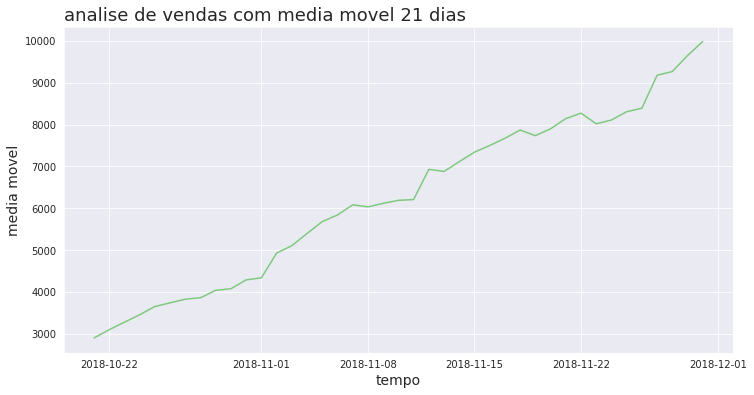

In [292]:
plotar('analise de vendas com media movel 21 dias', 'tempo', 'media movel', 'dia', 'media_movel21', alucel)

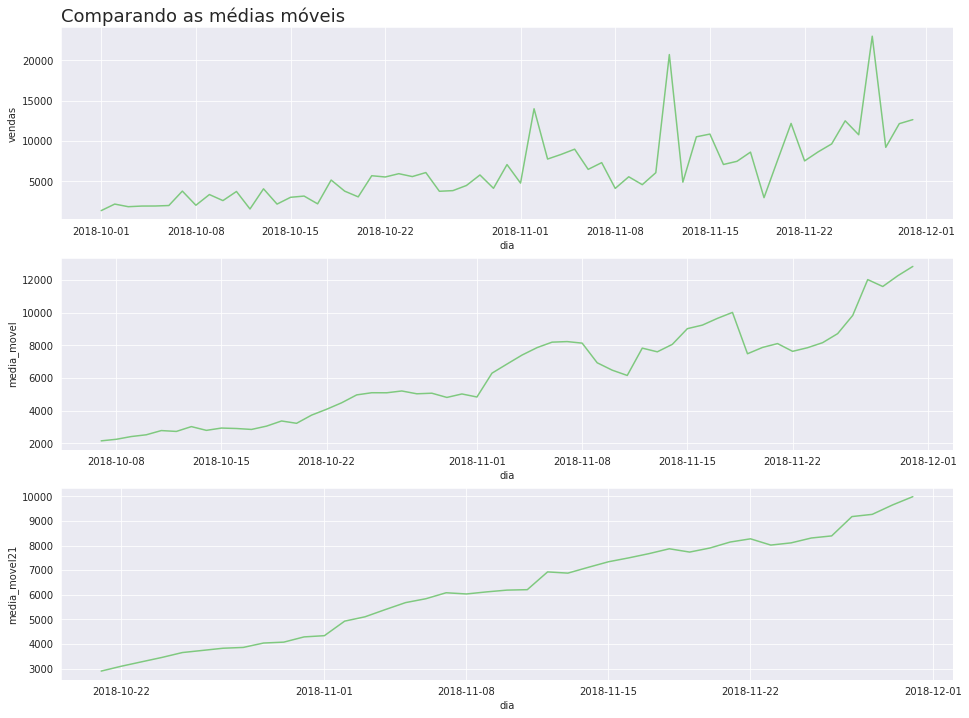

In [293]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel21', alucel, 'Comparando as médias móveis')